<a href="https://colab.research.google.com/github/hyphen-ani/Deep-Learning-Pytorch/blob/main/Deep_Learning_PyTorch_Workflow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# PyTorch Workflow

what_were_covering = {1: "data (prepare and load)",
                      2 : "Build Model",
                      3: "Fitting the model to data",
                      4: "Making predictions and evaluating the model",
                      5: "Save and Reload the Model",
                      6: "Putting it all together"}


what_were_covering

{1: 'data (prepare and load)',
 2: 'Build Model',
 3: 'Fitting the model to data',
 4: 'Making predictions and evaluating the model',
 5: 'Save and Reload the Model',
 6: 'Putting it all together'}

In [103]:
import torch
from torch import nn # Neural-Networks
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.3.0+cu121'

## 1. Data (Preparing & Loading)

Data can be almost anything... in machine learning

* Excel Spreadsheet
* Images
* Videos
* Audio
* DNA
* Text
* Anything in between


Machine Learning is a game of tow parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that

Let's Create some *known* data using the Linear Regression formulae

We'll use a linear regression formula to make a straight line with known parameters

In [62]:
# Creake *known* parameters

weight = 0.7
bias = 0.3

# Create some data

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Split Data into training and test sets

Training Set -> Validation Set -> Test Set

Lets create a training and test sets

In [63]:
# Create a train/test Split

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### How to visualize our data?


In [64]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, prediction=None):

  """
  Plot training data, test data and compares predictions
  """

  plt.figure(figsize=(10, 7))

  # Plot training data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot training data
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  if prediction is not None:
    plt.scatter(y_test, prediction, c="r", s=4, label="Predictions")

  plt.legend(prop={"size" : 14})


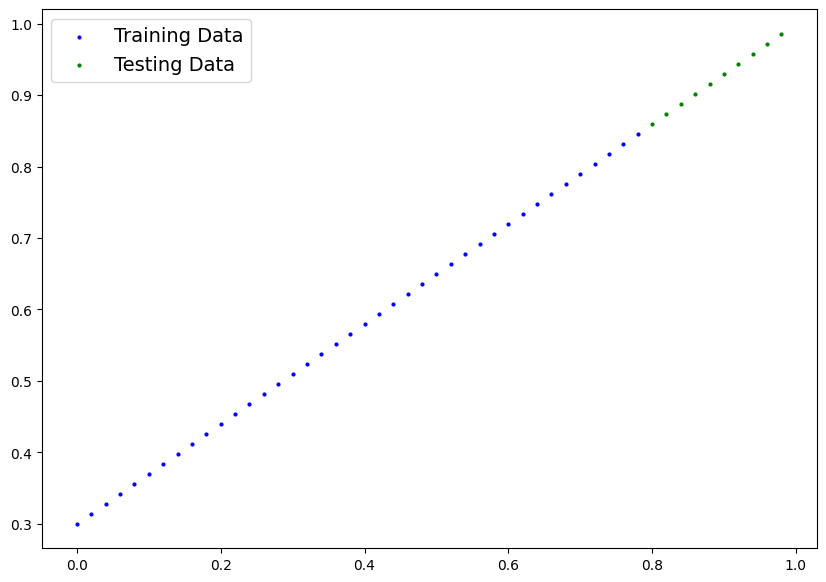

In [11]:
plot_predictions()

## 2. Build Model - Linear Regression Model

- Resource : OOP

What our model does:
* Start with random values
* Look at training data and adjust the random value to better respresent the ideal values (i.e, the weight and biases)

How does it do so?

1. Gradient Descent - https://youtu.be/IHZwWFHWa-w
2. Backpropagation - https://youtu.be/Ilg3gGewQ5U

In [65]:
# Create a Linear Regression Model Class

class LinearRegressionModel(nn.Module):# <- Everything in pyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


### PyTorch Model Building Essentials


* torch.nn - contains all of the buildings for computational graph (NN is a graph)
* torch.nn.Parameter - What parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - Base Class for all neural network class, if subclassed you should overwrite forward()
* torch.optim = this where the optimization in Pytorch, they will help with gradient descent.
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch Model

SO we can check our model parameters or whats inside our model using .parameters()



In [111]:
# Create a random seed

torch.manual_seed(42)

model_0 = LinearRegressionModel()

# Check the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [87]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check out model's predective power, let's see how well it predicts `y_test` based on `X_test`

When we pass our data through our model, it is going to run it through the `forward()` method.

In [112]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [113]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

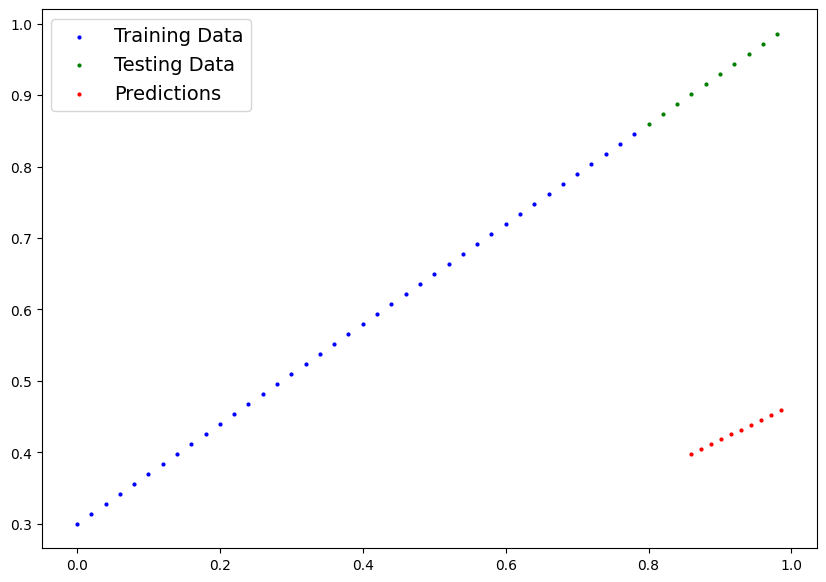

In [114]:
plot_predictions(prediction=y_preds)

## 3. Train Model

The whole idea of training is for a model to omve from some unknown parameters (may be random) to some *known* parameters

Poor Representation - Good Representation

Onw way to measure how poor or how wrong the prediction are is to use `Loss Function`

* Note : Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function

Things we need to train:

* **Loss Function** A function to measure how wrong your model's prediction are to the ideal outputs, lower the better

* **Optimizer** Takes into account the loss of a model and adjusts the model's parameters to improve the loss function

And specifically for PyTorch, we need:
* A Training Loop
* A Testing Loop

In [115]:
# Setup a loss Function
loss_fn = nn.L1Loss()
loss_fn

L1Loss()

In [116]:
# Setup a Optimizer - SGD
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01) #lr - hyperparameter
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

**Q:** Which loss function and optimizers to choose?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesnt with your particular problem set.

For example, for a regression problems, a loss function of `nn.L1Loss()` and an optimizer like `torch.nn.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (Binary Cross Entropy Loss).



### Building a Training Loop

A Couple of things we need in a training loop:

0. Loop through the data
1. Forward Pass (this involves data moving through our models `forward()`)
2. Calculate Loss (Compare forward pass predictions to ground truth lambda.
3. Optimizer Zero Grad
4. Loss Backward - Moves backward through the network to calculate the gradients of each of the parameters of our model with respective to the loss (**back propagation**)
5. Optimizer Step - Use the optimizer to adjust our model's parameters to try and improve the loss. (**gradient descent**)

In [117]:
torch.manual_seed(42)
# An Epoch - One Loop Through Data

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop Through The Data

for epoch in range(epochs):
  model_0.train() # Set the model into training mode

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate Loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer Zero-Grad
  optimizer.zero_grad()

  # 4. Perform Back-Propogation
  loss.backward()

  # 5. Perform Gradient Descent
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so.. we have to zero them above in step 3 first.

  ### Testing
  model_0.eval() # Turns off difference setting in the model that are not need for evaluation/testing
  with torch.inference_mode(): # Turns of gradient descent
    # 1. Forward Pass
    test_pred = model_0(X_test)
    # 2. Calculate Loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

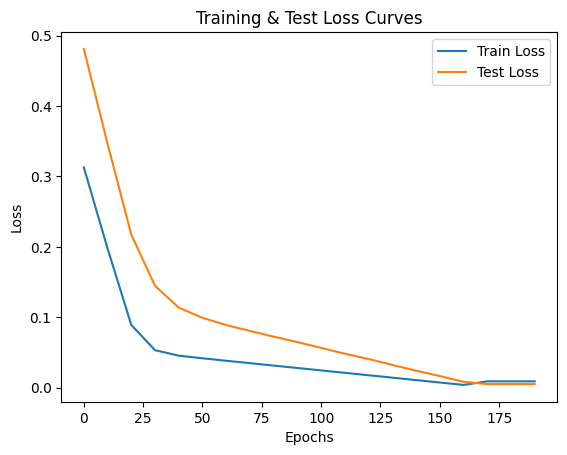

In [118]:
# Plot the loss curve

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training & Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [122]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

y_pred_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [120]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

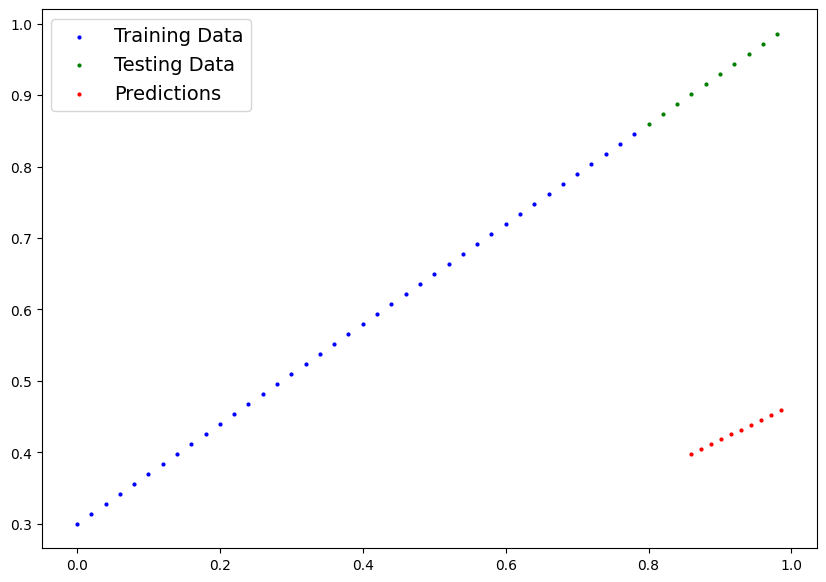

In [109]:
plot_predictions(prediction=y_preds)

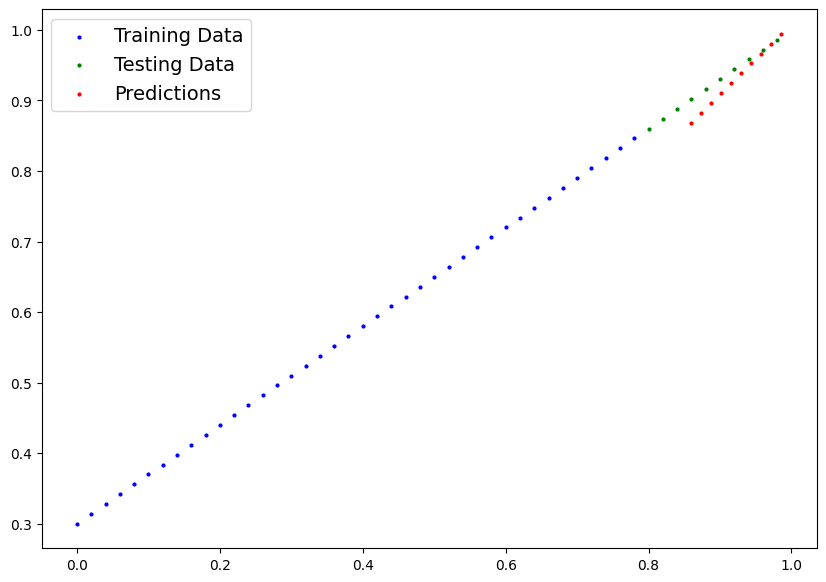

In [121]:
plot_predictions(prediction=y_pred_new)